In [13]:
%pip install scikit-learn

  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.3 MB 5.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/9.3 MB 5.1 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.3 MB 5.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.7/9.3 MB 5.5 MB/s eta 0:00:01
   -------------------------- ------------- 6.0/9.3 MB 5.7 MB/s eta 0:00:01
   ------------------------------- -------- 7.3/9.3 MB 5.7 MB/s eta 0:00:01
   ------------------------------------- -- 8.7/9.3 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 5.5 MB/s eta 0:00:00
Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib qt

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

GRID_SIZE = 10

def generate_cube_faces():
    """
    Generates all unique points on the cube's surface.
    """
    dots_set = set()
    for z in [0, GRID_SIZE - 1]:
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                dots_set.add((x, y, z))

    for y in [0, GRID_SIZE - 1]:
        for x in range(GRID_SIZE):
            for z in range(GRID_SIZE):
                dots_set.add((x, y, z))

    for x in [0, GRID_SIZE - 1]:
        for y in range(GRID_SIZE):
            for z in range(GRID_SIZE):
                dots_set.add((x, y, z))

    return list(dots_set)

def is_valid_line(dot1, dot2):
    """
    Determines if a line between two points is valid.
    """
    if dot1 == dot2:
        return False
    x1, y1, z1 = dot1
    x2, y2, z2 = dot2
    diff_x = abs(x1 - x2)
    diff_y = abs(y1 - y2)
    diff_z = abs(z1 - z2)
    if sum([diff_x > 0, diff_y > 0, diff_z > 0]) < 2:
        return False
    if (
        (x1 == x2 == 0 or x1 == x2 == GRID_SIZE - 1) or
        (y1 == y2 == 0 or y1 == y2 == GRID_SIZE - 1) or
        (z1 == z2 == 0 or z1 == z2 == GRID_SIZE - 1)
    ):
        return False
    return True

def compute_valid_lines(dots):
    """
    Returns a list of all valid (dot1, dot2) pairs.
    """
    valid_lines = []
    for i in range(len(dots)):
        for j in range(i + 1, len(dots)):
            if is_valid_line(dots[i], dots[j]):
                valid_lines.append((dots[i], dots[j]))
    return valid_lines

def visualize_realistic_cube(dots, valid_lines, num_lines=5, display=True):
    """
    Visualizes a 3D cube wireframe with random valid lines.
    """
    if not display:
        return

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    max_range = GRID_SIZE - 1
    ax.set_xlim(0, max_range)
    ax.set_ylim(0, max_range)
    ax.set_zlim(0, max_range)
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

    for edge in [
        [(0, 0, 0), (max_range, 0, 0)],
        [(0, max_range, 0), (max_range, max_range, 0)],
        [(0, 0, max_range), (max_range, 0, max_range)],
        [(0, max_range, max_range), (max_range, max_range, max_range)],
        [(0, 0, 0), (0, max_range, 0)],
        [(max_range, 0, 0), (max_range, max_range, 0)],
        [(0, 0, max_range), (0, max_range, max_range)],
        [(max_range, 0, max_range), (max_range, max_range, max_range)],
        [(0, 0, 0), (0, 0, max_range)],
        [(max_range, 0, 0), (max_range, 0, max_range)],
        [(0, max_range, 0), (0, max_range, max_range)],
        [(max_range, max_range, 0), (max_range, max_range, max_range)],
    ]:
        x, y, z = zip(*edge)
        ax.plot(x, y, z, color="black")

    x_dots, y_dots, z_dots = zip(*dots)
    ax.scatter(x_dots, y_dots, z_dots, color="blue", s=10)

    # print("\nSelected Lines:")
    # for _ in range(num_lines):
    #     line = random.choice(valid_lines)
    #     print(f"Line from {line[0]} to {line[1]}")
    #     x_line = [line[0][0], line[1][0]]
    #     y_line = [line[0][1], line[1][1]]
    #     z_line = [line[0][2], line[1][2]]
    #     ax.plot(x_line, y_line, z_line, color="red", linewidth=1)

    ax.axis("off")
    ax.set_title("Realistic 3D Cube Visualization")
    plt.show()

def visualize_forbidden_lines_only(dots, ref_point, display=True):
    """
    Visualizes only invalid lines from a reference point for debugging.
    Also prints the number of valid, invalid, and total lines from the reference point.
    """
    valid_lines = [dot for dot in dots if is_valid_line(ref_point, dot)]
    invalid_lines = [dot for dot in dots if not is_valid_line(ref_point, dot)]

    print(f"Reference Point: {ref_point}")
    print(f"Valid Lines: {len(valid_lines)}")
    print(f"Invalid Lines: {len(invalid_lines)}")
    print(f"Total Lines: {len(dots) - 1}")  # Exclude the reference point itself

    if not display:
        return

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")

    for edge in [
        [(0, 0, 0), (GRID_SIZE - 1, 0, 0)],
        [(0, GRID_SIZE - 1, 0), (GRID_SIZE - 1, GRID_SIZE - 1, 0)],
        [(0, 0, GRID_SIZE - 1), (GRID_SIZE - 1, 0, GRID_SIZE - 1)],
        [(0, GRID_SIZE - 1, GRID_SIZE - 1), (GRID_SIZE - 1, GRID_SIZE - 1, GRID_SIZE - 1)],
        [(0, 0, 0), (0, GRID_SIZE - 1, 0)],
        [(GRID_SIZE - 1, 0, 0), (GRID_SIZE - 1, GRID_SIZE - 1, 0)],
        [(0, 0, GRID_SIZE - 1), (0, GRID_SIZE - 1, GRID_SIZE - 1)],
        [(GRID_SIZE - 1, 0, GRID_SIZE - 1), (GRID_SIZE - 1, GRID_SIZE - 1, GRID_SIZE - 1)],
        [(0, 0, 0), (0, 0, GRID_SIZE - 1)],
        [(GRID_SIZE - 1, 0, 0), (GRID_SIZE - 1, 0, GRID_SIZE - 1)],
        [(0, GRID_SIZE - 1, 0), (0, GRID_SIZE - 1, GRID_SIZE - 1)],
        [(GRID_SIZE - 1, GRID_SIZE - 1, 0), (GRID_SIZE - 1, GRID_SIZE - 1, GRID_SIZE - 1)],
    ]:
        x, y, z = zip(*edge)
        ax.plot(x, y, z, color="black")

    ax.scatter(*ref_point, color="gold", s=100, label=f"Reference Point: {ref_point}")

    for dot in invalid_lines:
        ax.plot(
            [ref_point[0], dot[0]],
            [ref_point[1], dot[1]],
            [ref_point[2], dot[2]],
            color="red", linewidth=1, alpha=0.6
        )

    ax.set_xlim(0, GRID_SIZE - 1)
    ax.set_ylim(0, GRID_SIZE - 1)
    ax.set_zlim(0, GRID_SIZE - 1)
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes
    ax.set_title("Forbidden Lines from Reference Point")
    ax.legend()
    plt.show()


def main():
    dots = generate_cube_faces()
    valid_lines = compute_valid_lines(dots)
    visualize_realistic_cube(dots, valid_lines, num_lines=5, display=True)
    ref_point = (0, 0, 0)
    visualize_forbidden_lines_only(dots, ref_point, display=True)

main()


Reference Point: (0, 0, 0)
Valid Lines: 217
Invalid Lines: 271
Total Lines: 487


In [43]:
GRID_SIZE = 10

def test_duplicate_percentage_with_visualization(valid_lines, dots, runs_list, mode="iterating"):
    """
    Simulates drawing random valid lines, calculates duplicate percentages,
    predicts execution time, and visualizes lines on the cube.
    
    Modes:
    - "iterating": Dynamically shows two lines at a time (current and last).
    - "static": Draws all lines in one go, keeping previously drawn lines.
    
    Special behavior:
    - 9th and 10th iterations: Same line is drawn and marked as duplicate.
    - 19th and 20th iterations: Line and its reverse are drawn, marked as duplicate.
    """
    import matplotlib.pyplot as plt
    import time
    import numpy as np
    from sklearn.linear_model import LinearRegression

    duplicates_list = []
    percentages_list = []
    times_list = []
    last_line = None

    # Visualization setup
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_zlim(0, GRID_SIZE)
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

    # Remove background panels and grid for a clean look
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.grid(False)

    # Plot the cube wireframe
    for edge in [
        [(0, 0, 0), (GRID_SIZE, 0, 0)],
        [(0, GRID_SIZE, 0), (GRID_SIZE, GRID_SIZE, 0)],
        [(0, 0, GRID_SIZE), (GRID_SIZE, 0, GRID_SIZE)],
        [(0, GRID_SIZE, GRID_SIZE), (GRID_SIZE, GRID_SIZE, GRID_SIZE)],
        [(0, 0, 0), (0, GRID_SIZE, 0)],
        [(GRID_SIZE, 0, 0), (GRID_SIZE, GRID_SIZE, 0)],
        [(0, 0, GRID_SIZE), (0, GRID_SIZE, GRID_SIZE)],
        [(GRID_SIZE, 0, GRID_SIZE), (GRID_SIZE, GRID_SIZE, GRID_SIZE)],
        [(0, 0, 0), (0, 0, GRID_SIZE)],
        [(GRID_SIZE, 0, 0), (GRID_SIZE, 0, GRID_SIZE)],
        [(0, GRID_SIZE, 0), (0, GRID_SIZE, GRID_SIZE)],
        [(GRID_SIZE, GRID_SIZE, 0), (GRID_SIZE, GRID_SIZE, GRID_SIZE)],
    ]:
        x, y, z = zip(*edge)
        ax.plot(x, y, z, color="black")

    # Plot all the cube dots
    x_dots, y_dots, z_dots = zip(*dots)  # Extract from all cube points
    ax.scatter(x_dots, y_dots, z_dots, color="blue", s=10)

    # Prepare for linear regression model
    for run_index, runs in enumerate(runs_list):
        start_time = time.time()
        duplicates = 0

        # Simulation loop
        for iteration in range(runs):
            if iteration == 8 or iteration == 9:
                # 9th and 10th iterations: Same line
                current_line = ((0, 10, 0), (10, 0, 10))
                is_duplicate = last_line is not None and {current_line[0], current_line[1]} == {last_line[0], last_line[1]}
            elif iteration == 18 or iteration == 19:
                # 19th and 20th iterations: Line and its reverse
                if iteration == 18:
                    current_line = ((0, 10, 0), (10, 0, 10))
                else:
                    current_line = ((10, 0, 10), (0, 10, 0))  # Reverse line
                is_duplicate = last_line is not None and {current_line[0], current_line[1]} == {last_line[0], last_line[1]}
            else:
                # Random valid line
                current_line = random.choice(valid_lines)
                is_duplicate = last_line is not None and {current_line[0], current_line[1]} == {last_line[0], last_line[1]}

            if is_duplicate:
                duplicates += 1

            if mode == "iterating":
                # Clear previous lines for dynamic visualization
                ax.cla()
                # Re-plot cube wireframe and dots
                for edge in [
                    [(0, 0, 0), (GRID_SIZE, 0, 0)],
                    [(0, GRID_SIZE, 0), (GRID_SIZE, GRID_SIZE, 0)],
                    [(0, 0, GRID_SIZE), (GRID_SIZE, 0, GRID_SIZE)],
                    [(0, GRID_SIZE, GRID_SIZE), (GRID_SIZE, GRID_SIZE, GRID_SIZE)],
                    [(0, 0, 0), (0, GRID_SIZE, 0)],
                    [(GRID_SIZE, 0, 0), (GRID_SIZE, GRID_SIZE, 0)],
                    [(0, 0, GRID_SIZE), (0, GRID_SIZE, GRID_SIZE)],
                    [(GRID_SIZE, 0, GRID_SIZE), (GRID_SIZE, GRID_SIZE, GRID_SIZE)],
                    [(0, 0, 0), (0, 0, GRID_SIZE)],
                    [(GRID_SIZE, 0, 0), (GRID_SIZE, 0, GRID_SIZE)],
                    [(0, GRID_SIZE, 0), (0, GRID_SIZE, GRID_SIZE)],
                    [(GRID_SIZE, GRID_SIZE, 0), (GRID_SIZE, GRID_SIZE, GRID_SIZE)],
                ]:
                    x, y, z = zip(*edge)
                    ax.plot(x, y, z, color="black")
                ax.scatter(x_dots, y_dots, z_dots, color="blue", s=10)

                # Draw the last line in green if duplicate
                if last_line:
                    last_color = "green" if is_duplicate else "red"
                    x_last, y_last, z_last = zip(last_line[0], last_line[1])
                    ax.plot(x_last, y_last, z_last, color=last_color, linewidth=2)

                # Draw the current line
                current_color = "green" if is_duplicate else "red"
                x_current, y_current, z_current = zip(current_line[0], current_line[1])
                ax.plot(x_current, y_current, z_current, color=current_color, linewidth=2)

                ax.set_title(f"Iteration {iteration + 1}, Duplicates: {duplicates}")
                plt.pause(1)  # Pause for 1 second
            else:
                # In "static" mode, show all lines as specified by `runs`
                color = "green" if is_duplicate else "red"
                x_line, y_line, z_line = zip(current_line[0], current_line[1])
                ax.plot(x_line, y_line, z_line, color=color, linewidth=2)
                if iteration == runs - 1:  # Stop after the specified number of lines
                    break

            last_line = current_line

        end_time = time.time()
        elapsed_time = end_time - start_time
        duplicates_list.append(duplicates)
        percentages_list.append((duplicates / runs) * 100)
        times_list.append(elapsed_time)

        # Predict time for the next run
        if run_index < len(runs_list) - 1:
            next_run = runs_list[run_index + 1]
            model = LinearRegression()
            model.fit(np.array(runs_list[:run_index + 1]).reshape(-1, 1), np.array(times_list))
            predicted_time = model.predict([[next_run]])[0]
            print(f"Predicted time for {next_run} runs: {predicted_time:.2f} seconds")

    # Keep the plot open
    plt.show()

    return duplicates_list, percentages_list, times_list

# Example usage:
dots = generate_cube_faces()
valid_lines = compute_valid_lines(dots)
runs_list = [20]  # Show 25 lines
# For "iterating" mode:
test_duplicate_percentage_with_visualization(valid_lines, dots, runs_list, mode="iterating")
# For "static" mode:
#test_duplicate_percentage_with_visualization(valid_lines, dots, runs_list, mode="static")


KeyboardInterrupt: 

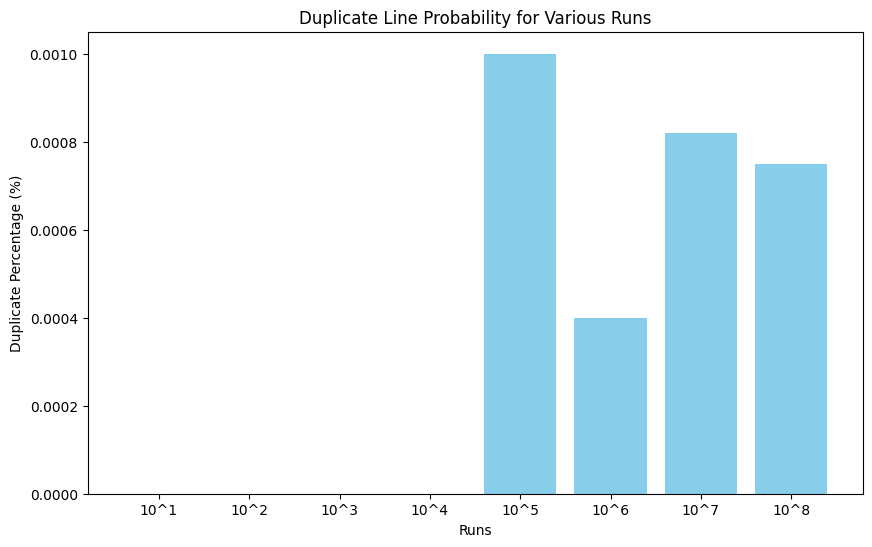

In [11]:
#PLOT histogram for the probability of duplicates percentages_list
plt.figure(figsize=(10, 6))
plt.bar(range(len(percentages_list)), percentages_list, color="skyblue")
plt.xlabel("Runs")
plt.ylabel("Duplicate Percentage (%)")
plt.title("Duplicate Line Probability for Various Runs")
plt.xticks(range(len(percentages_list)), [f"10^{i}" for i in range(1, 9)])
plt.show()